In [1]:
import pandas as pd
import seaborn as  sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:/python20/data_analysis projects/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
def conv(value):
    if value == 1:
        return "Yes"
    else :
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].map(conv)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

<Figure size 300x400 with 0 Axes>

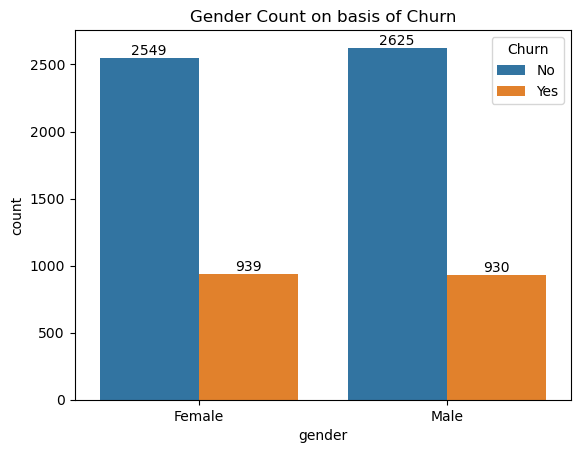

<Figure size 300x400 with 0 Axes>

In [9]:
ax = sns.countplot(x = "gender", data = df, hue = "Churn")
# ax.bar_label(ax.containers[0,1])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gender Count on basis of Churn")
plt.figure(figsize = (3,4))


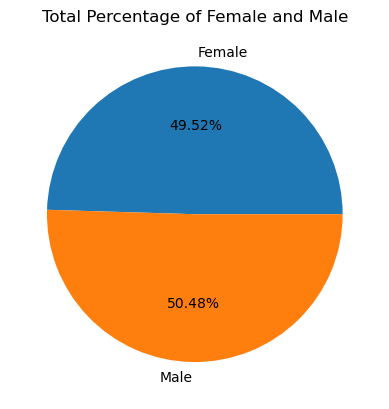

In [10]:
gb = df.groupby('gender').agg({'gender':'count'})
plt.title("Total Percentage of Female and Male")
plt.pie(x = gb["gender"], labels = gb.index,autopct = "%1.2f%%")
plt.show()

<Figure size 300x300 with 0 Axes>

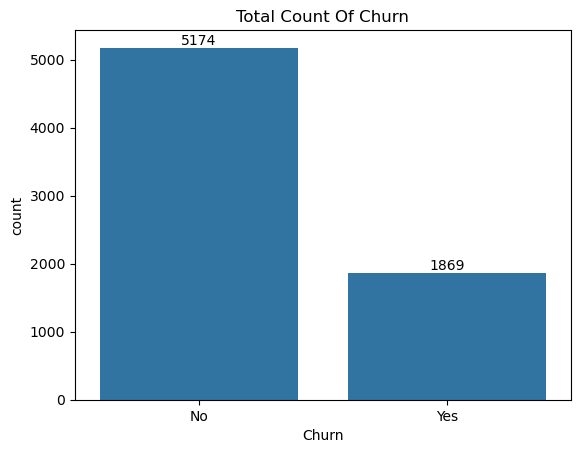

<Figure size 300x300 with 0 Axes>

In [11]:
ax = sns.countplot(x = "Churn", data = df)
# ax.bar_label(ax.containers[0,1])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Total Count Of Churn")
plt.figure(figsize = (3,3))

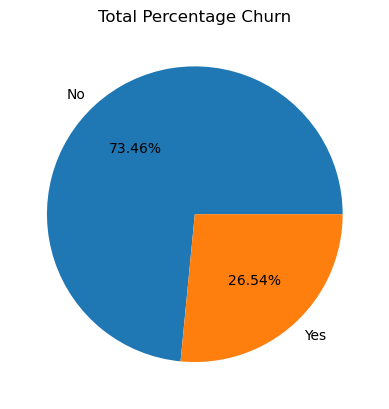

In [12]:
gb2 = df.groupby('Churn').agg({'Churn':'count'})
plt.title("Total Percentage Churn")
plt.pie(x = gb2["Churn"], labels = gb2.index,autopct = "%1.2f%%")
plt.show()

# from the given pie chart we can conclude that 26.54% of our customers have churned out. now let's explore the reason behind it

<Figure size 300x300 with 0 Axes>

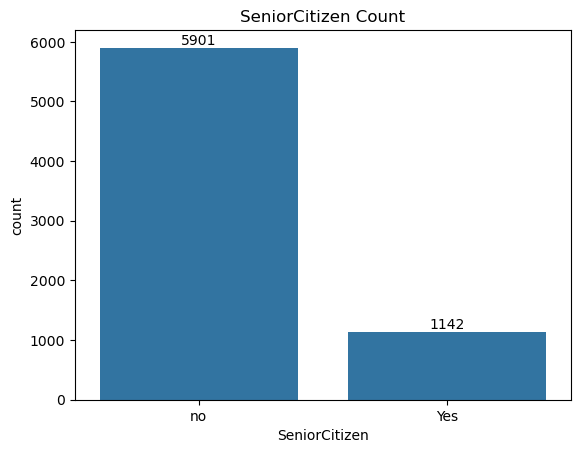

<Figure size 300x300 with 0 Axes>

In [24]:
ax = sns.countplot(x = "SeniorCitizen", data = df)
# ax.bar_label(ax.containers[0,1])
for container in ax.containers:
    ax.bar_label(container)
plt.title("SeniorCitizen Count")
plt.figure(figsize = (3,3))

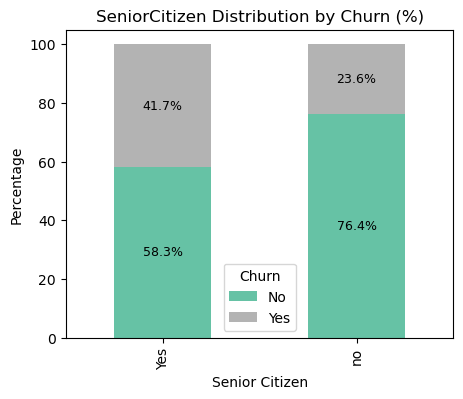

In [14]:
counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)

# 2. Convert to percentages (row-wise)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar chart
ax2 = percentages.plot(kind="bar", stacked=True, figsize=(5,4), colormap="Set2")

# 4. Add percentage labels in the middle of each bar segment
for i, (idx, row) in enumerate(percentages.iterrows()):
    cumulative = 0
    for churn_status, value in row.items():
        if value > 0:  # only label non-zero parts
            ax2.text(
                i, cumulative + value/2, f"{value:.1f}%",
                ha='center', va='center', fontsize=9, color='black'
            )
        cumulative += value

# 5. Title and labels
plt.title("SeniorCitizen Distribution by Churn (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()

# comparative a greater pecentage of people in senior citizen category have churned

<Axes: xlabel='tenure', ylabel='Count'>

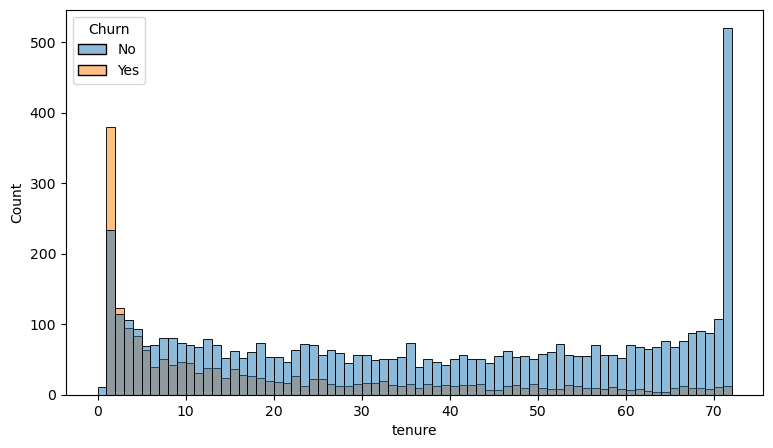

In [21]:
plt.figure(figsize = (9,5))
sns.histplot(x = "tenure", data = df,bins = 72, hue = "Churn" )

# people who have used our services for a long time have stayed and people who have used our sevices

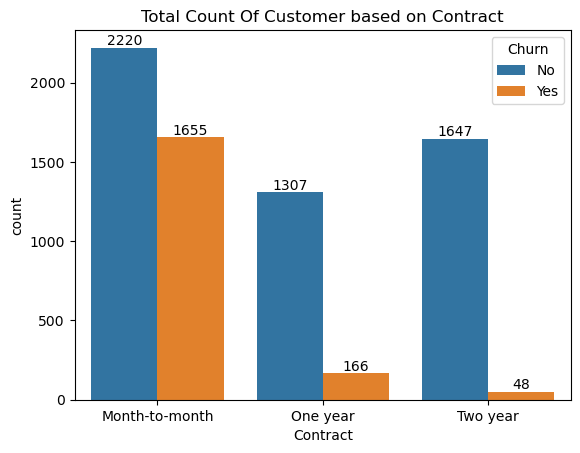

<Figure size 300x300 with 0 Axes>

In [27]:
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Total Count Of Customer based on Contract")
plt.figure(figsize = (3,3))
plt.show()

# 1 or 2 months have churned

In [28]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

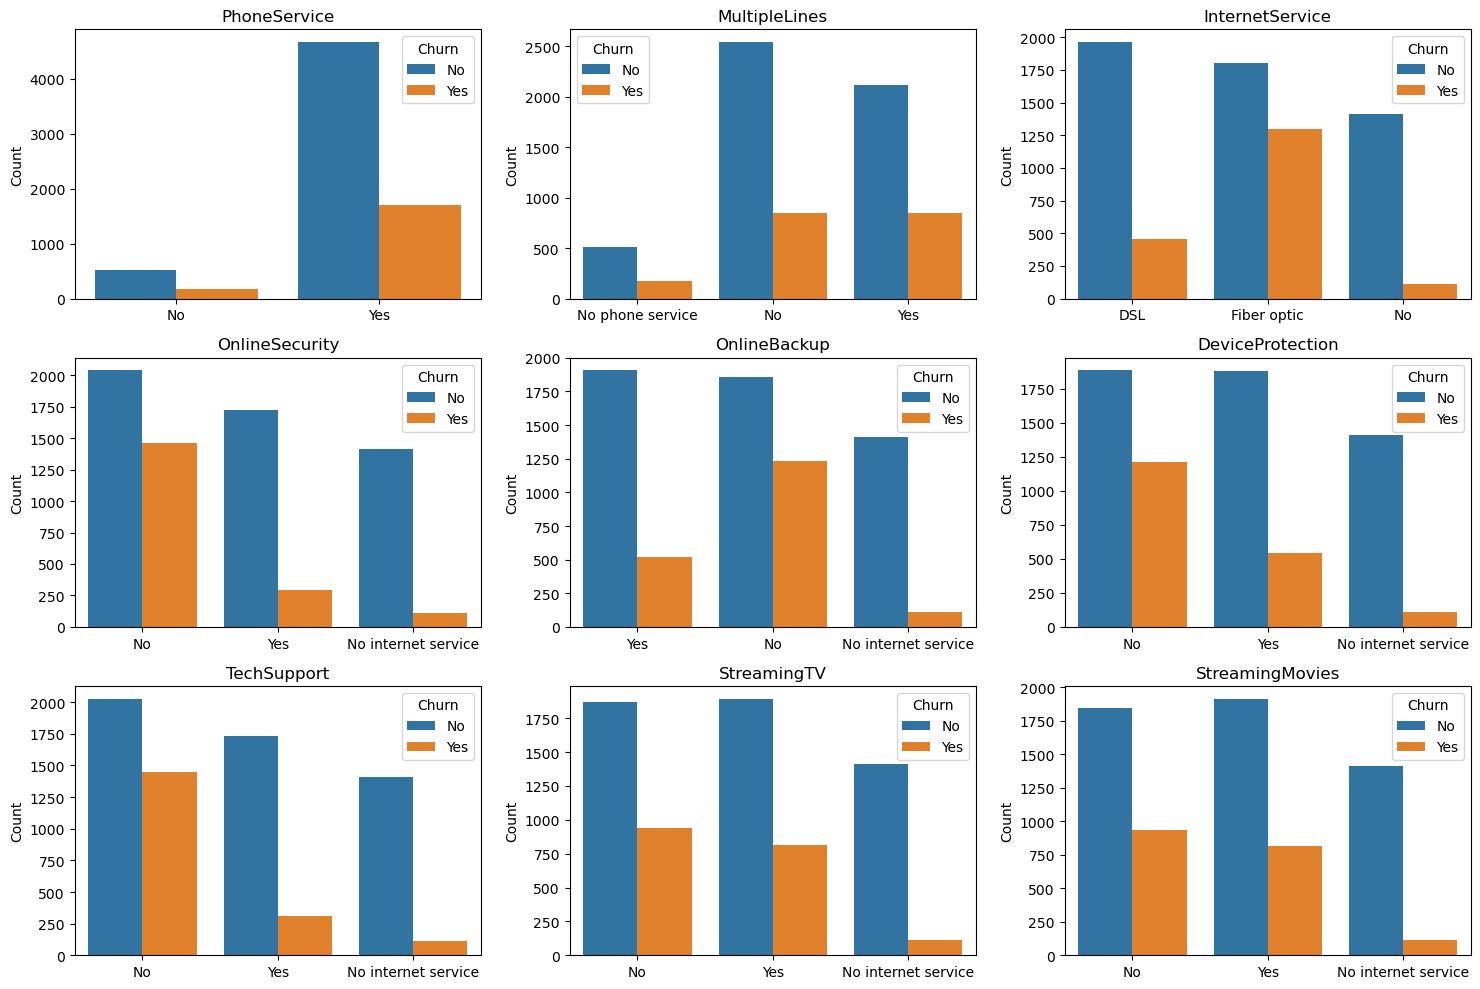

In [34]:


# Example: assuming your dataframe is called df
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Determine subplot grid size (3 columns for aesthetics)
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten to 1D array for easier indexing

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue= df["Churn"])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide unused subplots if any
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



# The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

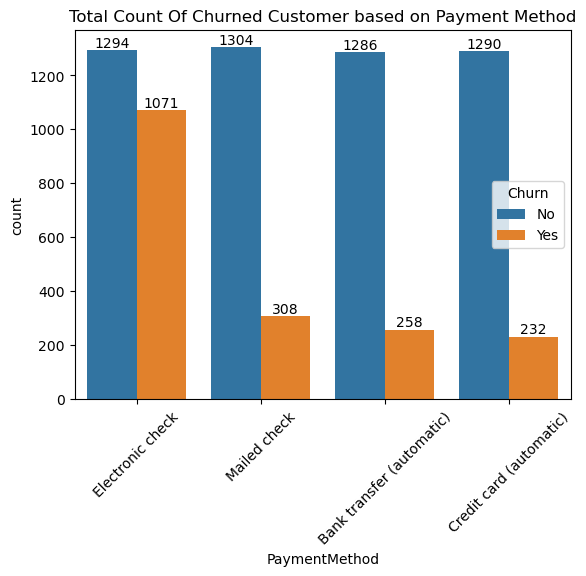

<Figure size 600x400 with 0 Axes>

In [55]:
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Total Count Of Churned Customer based on Payment Method")
plt.xticks(rotation = 45)
plt.figure(figsize = (6,4))

plt.show()

# customer is likely to churn when he is using electronic check as a payment method.